# Assignment : Fourier Analysis

## Goals
Apply techniques learned in Fourier series and transform lectures to solve the following questions. 

| Problem | Content | Points |
| :--- | :--- | :---: |
| Problem 1 | Function Approximation with Fourier: How many fourier components are required to approximate a given function on a finite interval within given error?  No fft; only numpy | 11 |            
| Problem 2 | For the data of the Sunspots for each year, compute the main period of the oscillations. Use fft. | 12 |
| Problem 3 | Apply Fourier transforms to given music data. De-noise the Sound Signal to best of your ability. <br/>What percentage of the (Fourier) data can be thrown away to recover top 5 frequencies? Use fft. | 10 | 
| Problem 4 | Apply Fourier transforms to a given image. <br/> Compare the original image with other versions of the image with the smallest Fourier components removed. | 15 |
| __Total__ | | __48__ | 

Please send your solution per mail to Martin and Stefan.

## Prerequisites

Install `librosa` and `scipy`. 

Then, import the required packages.

In [1]:
#!pip install librosa

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1: FOURIER COMPONENTS AND APPROXIMATION (11 points)

Approximate a given function on given finite interval with Fourier components within given error. Don't use scipy nor any other implementation of FFT here.

Proceed as follows:

1. Implement a method to compute a Fourier component. Use trapezoidal rule from `numpy` for the integration an a parameter $N$ specifying the number of grid points. <br>
    (4 points)

2. Implement a method to compute the Fourier approximation $f_{\rm app}$ using a given number ($2m+1$) of Fourier components. <br>
    (2 points)

3. Now apply the this functionality to approximate the function <br> 
$f_1(x) = 1 / (e^x + e^{-x})$ on the interval $[-3,3]$ <br>
Plot the approximation for different number of components in comparison with the original function $f$. 
Note: We have used $N=600$ gridpoints on the interval $[-3,3]$. <br>
(1 point)

4. How many Fourier components do you need to obtain an approximation at most 0.1% relative error? For measuring the error use <br/>
$\qquad {\rm error} = \frac{1}{N}\sum_i (|f(x_i) - f_{\rm app}(x_i)|)/f(x_i)$ <br>
where 
    - $N$ is the total number of grid points (also used for computing the integral in (a) and 
    - $f_{\rm app}$ the approximation obtained by the finite number of Fourier coefficients. 

    (2 points)
     
5. Now approximate the functions 
    - $f_2(x)=e^x$ on the interval $[-3,3]$
    - $f_3(x)=e^{|x|}$ on the interval $[-3,3]$
   
   and try again to achieve a 0.1% approxmation error. 
   Describe differences and try to explain them. <br>
   (2 points)

### Solution to Problem 1

In [3]:
TWOPI = 2*np.pi

def fourier_coeff(x,y,k):
    """
    Computes the k-th Fourier coefficient (component) for a function with values y defined on a grid 
    of x-values on the interval [-pi,pi]. Evaluates the integral numerically. 
    x -- array of x-values
    y -- array of y-values
    k -- integer number for indexing the Fourier component
    """
    ### YOUR CODE (START)

    
    ### YOUR CODE (END)
    

def fourier_app(f,a,N,m):
    """
    Computes the Fourier approximation for a function f on an interval [-a,a] (a>0) with 2m+1 components.
    f -- function to approximate
    a -- scale of the function defined on [-a,a]
    N -- number of x-grid points
    m -- parameter specifying the number of Fourier components 2m+1
    returns x,y,yappr,coeff (x-grid, function values on x-grid, approximate function values on x-grid, Fourier coefficients)
    """
    ### YOUR CODE (START)

    
    ### YOUR CODE (END)
    return x, y, yappr, coeff


def error(y, yappr):
    """
    Computes the relative error of the approximation.
    """
    ### YOUR CODE (START)

    
    ### YOUR CODE (END)

    return ...

In [4]:
def f1(x):
    return 1/(np.exp(x)+np.exp(-x))
    
def f2(x):
    return np.exp(x)

def f3(x):
    return np.exp(-np.abs(x))

__Function f1__

0.0053233514461183806
0.0021853041372965243
0.0005686338761764804


/Users/martinm/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/martinm/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/martinm/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


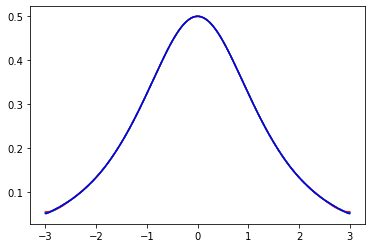

In [5]:
x, y, yappr1, coeff1 = fourier_app(f1, 3.0, 600, 5)
print(error(y,yappr1))
x, y, yappr2, coeff2 = fourier_app(f1, 3.0, 600, 10)
print(error(y,yappr2))
x, y, yappr3, coeff3 = fourier_app(f1, 3.0, 600, 25)
print(error(y,yappr3))

plt.plot(x,y,'b--')
plt.plot(x,yappr1,'r-')
plt.plot(x,yappr2,'g-')
plt.plot(x,yappr3,'b-')


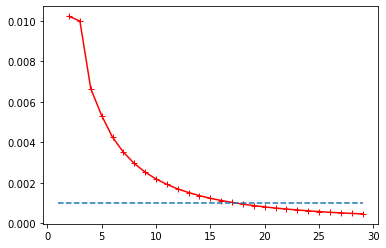

In [6]:
errs = []
mm = []
for m in range(2,30,1):
    mm.append(m)
    x, y, yappr, coeff = fourier_app(f1, 3.0, 600, m)
    err = error(y,yappr)
    errs.append(err)

plt.plot(mm,errs,"r-+")
plt.plot([1,29],[0.001,0.001],"--")

__Function f2__

2.191038689050099
0.8514498912790495
0.3374100656125798


/Users/martinm/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/martinm/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/martinm/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


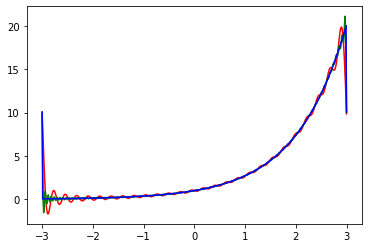

In [7]:
### YOUR CODE (START)

    
### YOUR CODE (END)

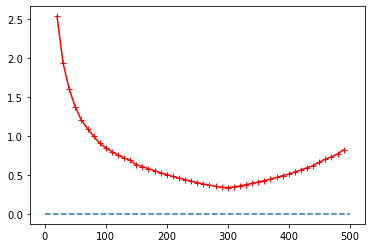

In [8]:
### YOUR CODE (START)

    
### YOUR CODE (END)

__Function f3__

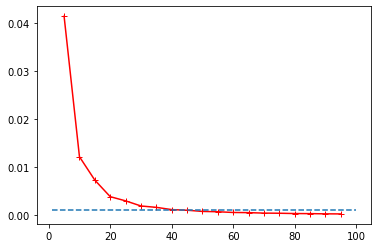

In [9]:
### YOUR CODE (START)

    
### YOUR CODE (END)

0.0007722393905010696


/Users/martinm/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


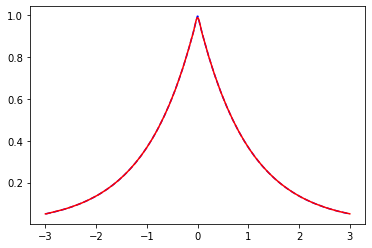

In [10]:
### YOUR CODE (START)

    
### YOUR CODE (END)

## Problem 2: APPLICATION OF FOURIER ANALYSIS TO A DATASET (12 points)

Apply Fourier analysis to the sunspot data - here, use FFT routine (from `numpy` or `scipy`). 

1. Power spectrum is the square of the amplitude of the fourier components. Plot it. Find the dominant period of oscillation by identifying it from the Fourier component with the largest amplitude. Note that this will give you an estimate for the length of the so called _solar cycle_. (4 points)

2. Can you identify any other period in the sunspot data - by further analysing the Fourier spectrum? (2 points)

3. Study the data values obtained by removing some of the components in the Fourier spectrum and inverting the result: 
   - removing the largest components (e.g. k>20)
   - removing the smallest components (e.g k<5)
   
   Characterise the resulting data! (3 points) 

4. Compare the results obtained here by using the FFT from the result that you obtain by applying the method implemented in Problem 1. <br/>Do you observe differences in the Fourier coefficients among them? What could be the reason for any differences? (3 points) 

### Solution to the Problem 2

In [11]:
import scipy
from scipy.fft import fft, ifft, fftfreq, fft2,ifft2

(315,) (315,)


(1700.0, 1950.0)

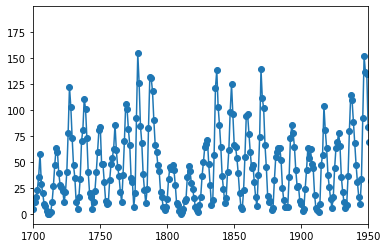

In [12]:
def load_data(path='./sunspot_data.txt'):
    ss_=np.loadtxt(path)
    ss_=ss_.reshape(63*5,2);
    date=ss_[:,0];
    ss=ss_[:,1]
    print(date.shape, ss.shape)
    return date, ss

date,ss = load_data()
plt.plot(date,ss,'o-')
plt.xlim(1700,1950)

__Step 1.__

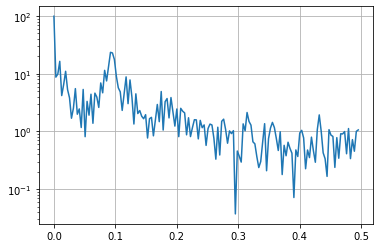

In [13]:
N  = date.size
delta = 1.0 # sampling rate (per y)
## use fft and fftfreq to compute the Fourier spectrum 
### YOUR CODE (START)
yf = ...
intensity = ...
xf = ...
### YOUR CODE (END)

plt.plot(xf[:N//2], intensity[0:N//2]) # positive frequencies
plt.yscale('log')
plt.grid()
#plt.xlim(0.15, 0.2)

In [14]:
# determine the position of the first peak at a location > 0 and the associated period

### YOUR CODE (START)




### YOUR CODE (END)


29
10.86206896551724


YOUR FINDINGS:

__Step 2.__


In [15]:
# determine the position of the second peak at a location > 0 and the associated period

### YOUR CODE (START)




### YOUR CODE (END)

55
5.7272727272727275


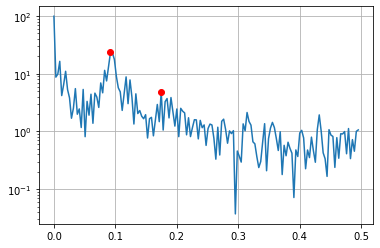

In [16]:
plt.plot(xf[:N//2], intensity[0:N//2]) # positive frequencies
plt.yscale('log')
plt.grid()

plt.plot([xf[index1]],[intensity[index1]],"ro")
plt.plot([xf[index2]],[intensity[index2]],"ro")


__Step 3.__

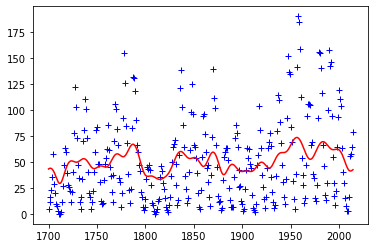

In [17]:
# Smoothing -> remove larger Fourier components:

def print_top_freqs(freqs, title):
    print(title)
    for freq in sorted(freqs):
        print(f"- {freq:.3f} Hz")

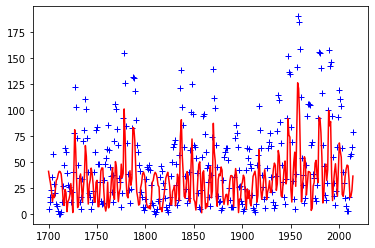

In [18]:
# Remove baseline -> remove small Fourier components:

### YOUR CODE (START)




### YOUR CODE (END)

## Problem 3: FREQUENCY-BASED FILTERING OF MUSIC - 10 points

Here, you will analyse music data.

1. For the sound signal, plot the amplitude spectrum (waveplot). Zoom into the waveplot to get some insight into the structure. 
Use the librosa library (`librosa.load`, `librosa.display.waveplot`). Plot also the amplitude spectrum. Why is it symmetric w.r.t. changing the sign of the frequency? (4 points)

2. Separate the sound signal in a part above and below 2 kHz in frequencies. Identify the top 5 frequencies in the beats (in each of the two ranges. (3 points)

3. Compute the error of the reconstruction for the filtered signals - for the low pass (freq>2kHz removed) and the high pass (freq<2kHz removed). Refer to the definition of error from problem 1. Which one gives the better approximation? Write the filtered reconstructed data (real part) to a `wav`-file and listen to the sound. Can you hear a difference? (3 points)


### Solution to the Problem (3)

In [19]:
from IPython.display import Audio
import librosa
from librosa import display
import soundfile as sf

In [20]:
wavefile='./Casio-MT-45-16-Beat.wav'

In [21]:
Audio(wavefile)

__Step 1.__

In [21]:
#help(librosa.load)
#help(librosa.display.waveplot)

Sampling rate (number samples per sec): 44100 (44.1 kHz), time: 3.6 sec


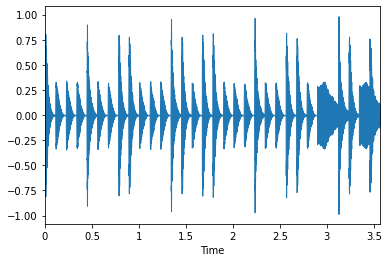

In [22]:
### YOUR CODE (START)




### YOUR CODE (END)

In [23]:
print(y)

[ 0.00468445  0.01211548 -0.00395203 ...  0.04043579  0.06381226
 -0.01794434]


(0.0, 1000.0)

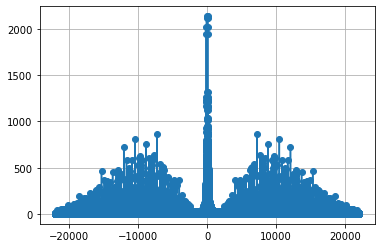

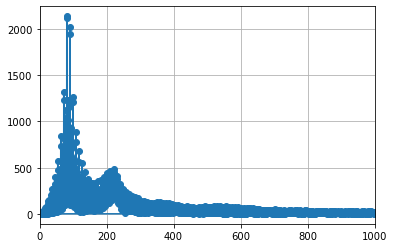

In [24]:
# Fourier spectrum -> intensities
### YOUR CODE (START)








### YOUR CODE (END)

__Step 2.__

In [25]:
# Dominant frequencies (upper part of the spectrum) 
### YOUR CODE (START)




### YOUR CODE (END)

# Dominant Frequencies (lower part of the spectrum) 
### YOUR CODE (START)




### YOUR CODE (END)

Large Freqs:  [ 7246.88591552 10467.69292436  8857.42971121 12078.23672005
  7649.52186444]
Intensities:  [863.0124 815.1635 753.9285 726.8291 635.4559]
Small Freqs:  [80.80777233 81.9301025  89.7864137  90.90874387 71.82913096]
Intensities:  [2138.6055 2116.9175 2026.9954 1950.6451 1318.5665]


(0.0, 200.0)

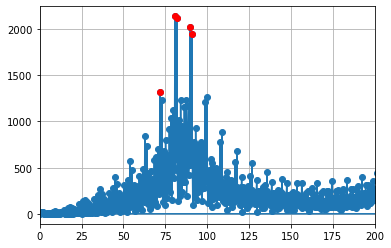

In [26]:
# Lower part
plt.plot(xs, Px,'o-')
plt.plot(xs_sel[index[0:5]], Px_sel[index[0:5]],'ro')
plt.grid()
plt.xlim(0,200)

__Step 3.__

<Figure size 432x288 with 0 Axes>

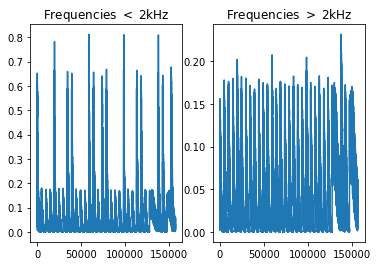

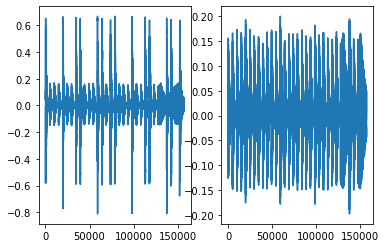

In [27]:
### YOUR CODE (START)






### YOUR CODE (END)

Low pass: 6199.825684
High pass: 9308.574219


/Users/martinm/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/martinm/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


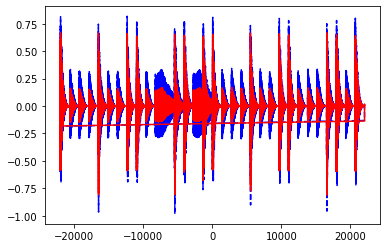

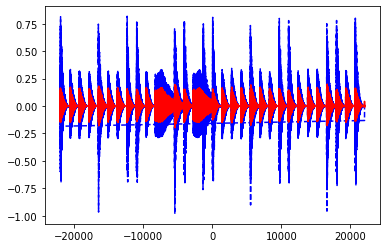

In [28]:
plt.figure(1)
plt.plot(xs, y, 'b--')
plt.plot(xs, recon1, 'r-')
print("Low pass: %f"%np.sum(np.abs(y-recon1)))
# -> beat is well recognized.

plt.figure(2)
plt.plot(xs, y, 'b--')
plt.plot(xs, recon2, 'r-')
print("High pass: %f"%np.sum(np.abs(y-recon2)))
# beat not well recognized.

Play the sound of the reconstructed signals (without below / above threshold): 

In [29]:
sf.write('./filtered1.wav', 1.0e9*np.real(recon1), sr, 'PCM_24')
Audio('./filtered1.wav')

In [30]:
sf.write('./filtered2.wav', 1.0e9*np.real(recon2), sr, 'PCM_24')
Audio('./filtered2.wav')

## Problem 4: 2-D APPLICATION OF FOURIER ANALYSIS ON AN IMAGE - 15 points

Analyse the provided image data using 2-d FFT package.

1. Using the image, decompose 2-D distribution of the absolute value of the Fourier components. Explain the nature of the distribution. (4 point)

2. Remove the Fourier components with absolute amplitude below a given threshold (as a percentage of the maximum amplitude) by using the thresholds = 0.001%, 0.01%, 0.1%, 1%, 10%. Do an inverse Fourier transform and depict the resulting images. Compare them with the original image and point out the differences.  (6 points)

3. Compute the error between reconstructed and original image where error is given as defined in problem 1. How many coefficients are needed to achieve an error of at most 1%? How much data can be compressed when allowing for an error of at most 1%? (5 points)
    

### Solution of the problem 4


(2304, 3456)


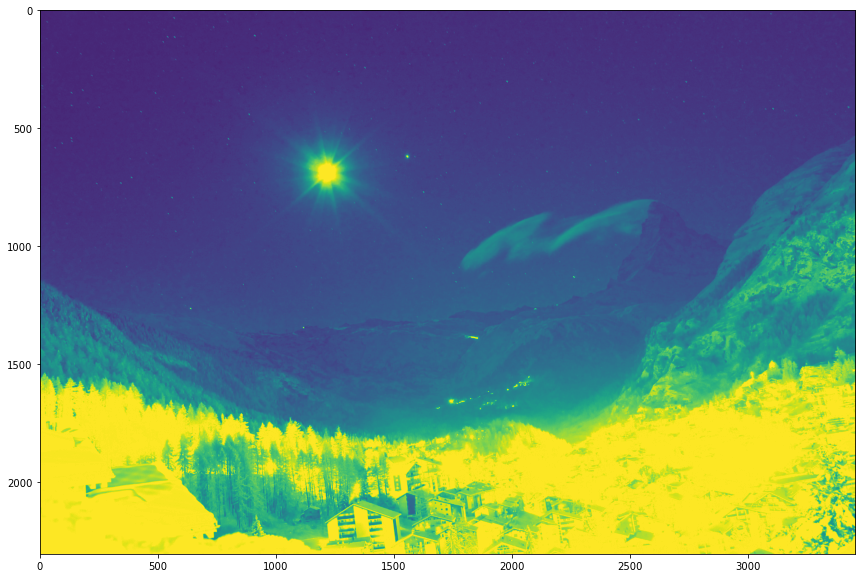

In [31]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img_=mpimg.imread('./img.jpg')
img=img_[:,:,0] # RED part of RGB Image
print(img.shape)
plt.figure(figsize=(16,10))
plt.imshow(img)
plt.show()


In [32]:
d = 2.5 / 315 # UNITS

__Step 1:__

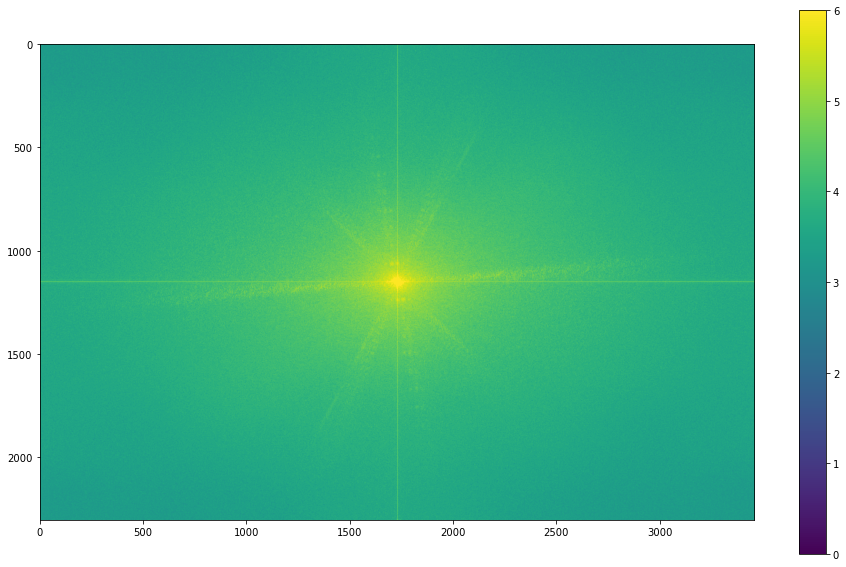

In [33]:
### YOUR CODE (START)




### YOUR CODE (END)

The image above is the 2-D distribution of the absolute value of the Fourier components. 

Note that 
- the absolute of the Fourier components are larger near the center and get smaller when radially moving out. This is because most power is located at lower scales. 
- many radial streaks are more dominant in the horizontal direction. This is because the FFT operates on the rows and columns. In the original image, we see that there are extended bright town lights in the horizontal direction. The emission in the "town lights" spread over a large area, i.e. smaller scales, i.e the streaks in the FFT extend to the edge of the box.     

__Step 2:__


In [40]:
thresh=[0.0,0.001,0.01,0.1,1,10];
nthresh = len(thresh)
NCOL = 3
NROW = nthresh // NCOL + (0 if nthresh % NCOL == 0 else 1)

Percentage of data above thresholds are: [100.0, 30.786735628858025, 1.4671922220614713, 0.0390574765303498, 0.001770773051697531, 6.279337062757202e-05]


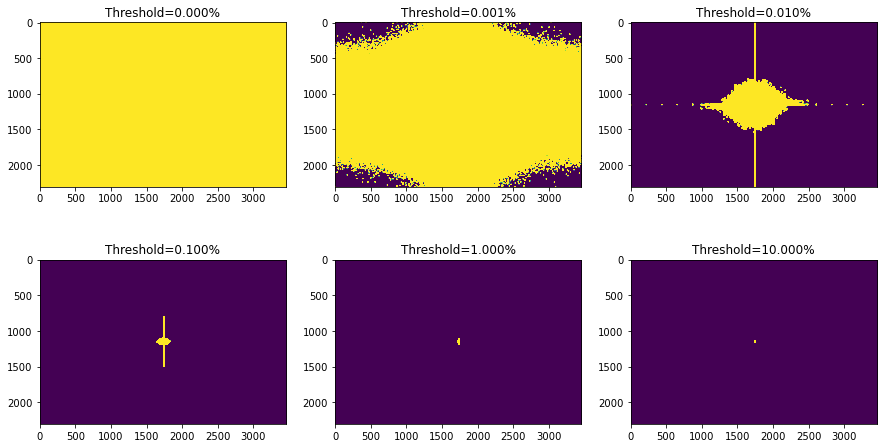

In [42]:
yfst=[0]*nthresh
nfrac=[0]*nthresh
for i in range(nthresh):
    yfs_=yfs*0
    idx=np.where(np.abs(yfs)>np.abs(yfs).max()*thresh[i]/100.)
    yfs_[idx]=yfs[idx]
    yfst[i]=yfs_
    nfrac[i]=len(idx[0])/(yfs.shape[0]*yfs.shape[1])*100

#plt.imshow(np.abs(yfst[1]),vmin=0,vmax=6);plt.colorbar()
print(f"Percentage of data above thresholds are: {nfrac}")

f,ax=plt.subplots(NROW,NCOL,figsize=(15,8))
irow=0
icol=0
for i in range(nthresh):
    ax[irow,icol].imshow(np.abs(yfst[i]),vmin=0,vmax=6)
    ax[irow,icol].set_title(f"Threshold={thresh[i]:.3f}%")
    icol += 1
    if icol%NCOL==0:
        icol = 0
        irow += 1

plt.show()

(c) Do a inverse Fourier Transform and show the image for the thresholds in (b). 
Plot the reconstructed image and compare it with original image, point out the differences between them? 
Compute the Error in the reconstructed image, where error is defined in problem 1. Plot the error versus the amount of data compressed obtained in (b).(5 marks)

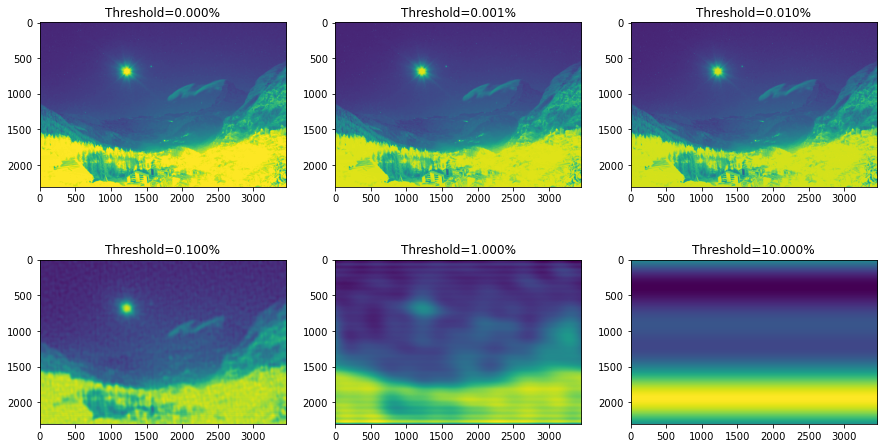

In [43]:
# reconstructed images after thresholding

### YOUR CODE (START)




### YOUR CODE (END)

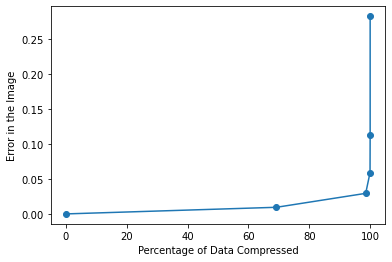

In [44]:
#plot reconstruction error
### YOUR CODE (START)




### YOUR CODE (END)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2c921941-9604-4099-90d4-1d4be742febc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>